## 1. Plot Performance

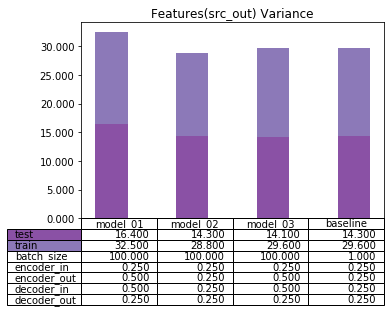

In [90]:
import matplotlib.pyplot as plt
import numpy as np

data = [[ 16.4, 32.5, 100, 0.25,  0.5,  0.5, 0.25],
        [ 14.3, 28.8, 100, 0.25, 0.25, 0.25, 0.25],
        [ 14.1, 29.6, 100, 0.25,  0.5,  0.5, 0.25],
        [ 14.3, 29.6,   1, 0.25, 0.25, 0.25, 0.25]]

data = np.transpose(data)
odata = data.copy()
data[1,:] = data[1,:]-data[0,:]
columns = ('model_01', 'model_02', 'model_03', 'baseline')
rows = ['test', 'train', 'batch_size', 'encoder_in', 'encoder_out', 'decoder_in', 'decoder_out']

values = np.arange(0, 35, 5)
value_increment = 1

# Get some pastel shades for the colors
n_rows = len(rows)
colors = plt.cm.BuPu(np.linspace(0, 0.7, n_rows))
colors[0:5] = 0

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    cell_text.append(['%1.3f' % (x ) for x in odata[n_rows-row-1,:]])
    if(row < 2):
        plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[n_rows-row-1])
        y_offset = y_offset + data[row]
    
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.yticks(values * value_increment, ['%1.3f' % val for val in values])
plt.xticks([])
plt.title('Features(src_out) Variance')

plt.show()

## 2. Checking Variance of features obtained from encoder

In [39]:
import numpy as np

feature_path = ['features_tr_01.npy', 'features_tr_02.npy', 'features_tr_03.npy', 'features_test_01.npy', 'features_test_02.npy', 'features_test_03.npy']
labels = ['tr_1', 'tr_2', 'tr_3', 'test_1', 'test_2', 'test_3']
# calculate var
variances = []
for i in range(0,len(feature_path)):
    features = np.load(feature_path[i], allow_pickle=True)
    for num,j in enumerate(features):
        feature = np.reshape(j, (-1, 128))
        if num == 0:
            word_features = feature
        else:
            word_features = np.concatenate((word_features, feature), axis=0)
    variance = np.var(word_features)
    variances.append(variance)
    print('{}\t:{}'.format(labels[i], variance))
variances = np.reshape(np.array(variances),(2,3))
print(variances)

tr_1	:0.17169855535030365
tr_2	:0.33769646286964417
tr_3	:0.27250614762306213
test_1	:0.05329844728112221
test_2	:0.11175413429737091
test_3	:0.08644938468933105
[[0.17169856 0.33769646 0.27250615]
 [0.05329845 0.11175413 0.08644938]]


[0.69928489 0.79278739 0.88387543 1.        ]
[0. 0. 0.]
[0.17169856 0.33769646 0.27250615]
[0.54901961 0.58559016 0.77517878 1.        ]
[0.17169856 0.33769646 0.27250615]
[-0.11840011 -0.22594233 -0.18605676]


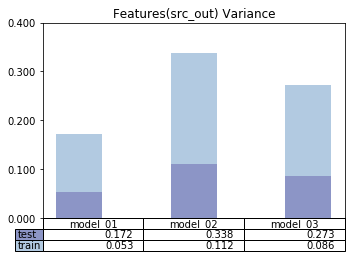

In [86]:
# adapted from Table Demo of matplotlib

import matplotlib.pyplot as plt


data = variances.copy()
data[1,:] = data[1,:]-data[0,:]
columns = ('model_01', 'model_02', 'model_03')
rows = ['test', 'train']

values = np.arange(0, 0.5, 0.1)
value_increment = 1

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0.3, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    print(colors[row])
    print(y_offset)
    print(data[row])

    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[n_rows-row-1])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.3f' % (x ) for x in variances[n_rows-row-1,:]])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.yticks(values * value_increment, ['%1.3f' % val for val in values])
plt.xticks([])
plt.title('Features(src_out) Variance')

plt.show()

## 3. Checking if same sentence saying in different languages have same meaning as wanted

In [53]:
# here d is the numerator in function calculate_diff
ds_path = ['d_tr.npy', 'd_rev_tr.npy']
labels = ['d_tr', 'd_rev_tr']
# calculate var
avgs = []
for i in range(0,len(ds_path)):
    ds = np.load(ds_path[i], allow_pickle=True)
    for num,j in enumerate(ds):
        d = np.reshape(j, (-1, 1))
        if num == 0:
            sentence_ds = d
        else:
            sentence_ds = np.concatenate((sentence_ds, d), axis=0)
    avg = np.average(sentence_ds)
    avgs.append(avg)
    print('{}: {}'.format(labels[i], avg))


d_tr: 5.423969745635986
d_rev_tr: 3.1224701404571533
